In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('youtoxic_english_1000.csv')

# Visualizar las primeras filas
print(df.head())

# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())


              CommentId      VideoId  \
0  Ugg2KwwX0V8-aXgCoAEC  04kJtp6pVXI   
1  Ugg2s5AzSPioEXgCoAEC  04kJtp6pVXI   
2  Ugg3dWTOxryFfHgCoAEC  04kJtp6pVXI   
3  Ugg7Gd006w1MPngCoAEC  04kJtp6pVXI   
4  Ugg8FfTbbNF8IngCoAEC  04kJtp6pVXI   

                                                Text  IsToxic  IsAbusive  \
0  If only people would just take a step back and...    False      False   
1  Law enforcement is not trained to shoot to app...     True       True   
2  \nDont you reckon them 'black lives matter' ba...     True       True   
3  There are a very large number of people who do...    False      False   
4  The Arab dude is absolutely right, he should h...    False      False   

   IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  IsNationalist  \
0     False          False      False         False     False          False   
1     False          False      False         False     False          False   
2     False          False       True         False     False 

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64


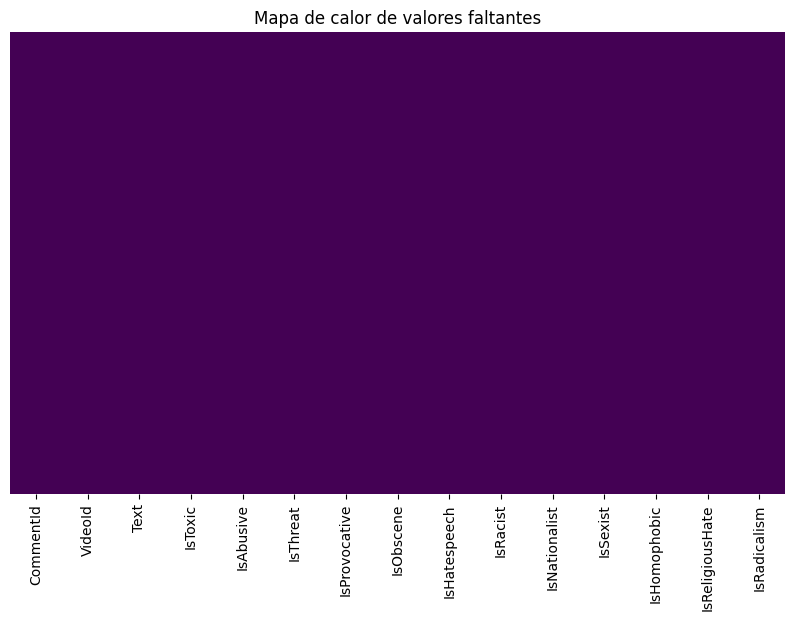

In [2]:
# Verificar valores faltantes
print(df.isnull().sum())

# Visualizar valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()


IsToxic: IsToxic
False    0.538
True     0.462
Name: proportion, dtype: float64
IsAbusive: IsAbusive
False    0.647
True     0.353
Name: proportion, dtype: float64
IsThreat: IsThreat
False    0.979
True     0.021
Name: proportion, dtype: float64
IsProvocative: IsProvocative
False    0.839
True     0.161
Name: proportion, dtype: float64
IsObscene: IsObscene
False    0.9
True     0.1
Name: proportion, dtype: float64
IsHatespeech: IsHatespeech
False    0.862
True     0.138
Name: proportion, dtype: float64
IsRacist: IsRacist
False    0.875
True     0.125
Name: proportion, dtype: float64
IsNationalist: IsNationalist
False    0.992
True     0.008
Name: proportion, dtype: float64
IsSexist: IsSexist
False    0.999
True     0.001
Name: proportion, dtype: float64
IsHomophobic: IsHomophobic
False    1.0
Name: proportion, dtype: float64
IsReligiousHate: IsReligiousHate
False    0.988
True     0.012
Name: proportion, dtype: float64
IsRadicalism: IsRadicalism
False    1.0
Name: proportion, dtype: fl

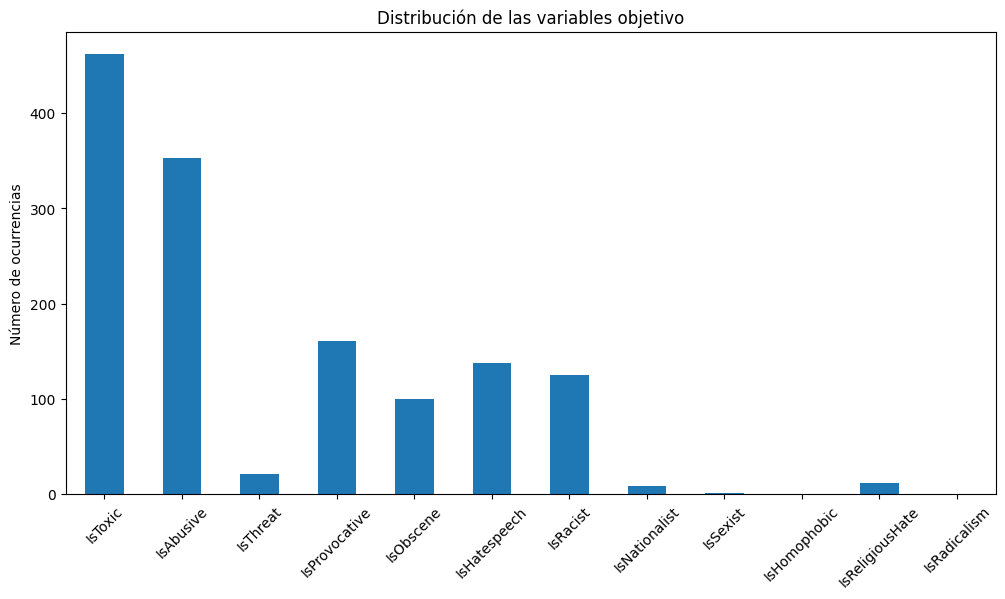

In [3]:
# Calcular la proporción de cada variable objetivo
target_columns = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 
                  'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

for col in target_columns:
    print(f"{col}: {df[col].value_counts(normalize=True)}")

# Visualizar la distribución
plt.figure(figsize=(12, 6))
df[target_columns].sum().plot(kind='bar')
plt.title('Distribución de las variables objetivo')
plt.ylabel('Número de ocurrencias')
plt.xticks(rotation=45)
plt.show()


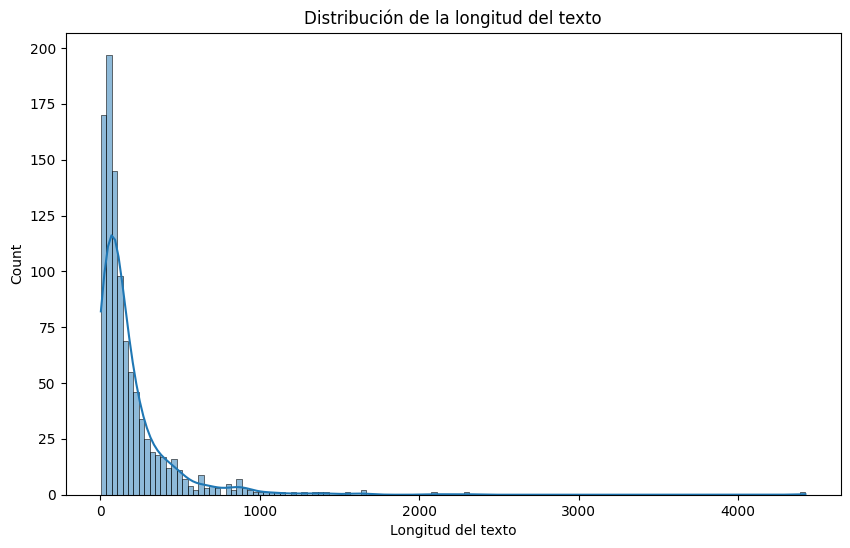

count    1000.000000
mean      185.554000
std       270.780777
min         3.000000
25%        47.000000
50%       101.000000
75%       217.000000
max      4421.000000
Name: text_length, dtype: float64


In [4]:
# Añadir una columna con la longitud del texto
df['text_length'] = df['Text'].str.len()

# Visualizar la distribución de la longitud del texto
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], kde=True)
plt.title('Distribución de la longitud del texto')
plt.xlabel('Longitud del texto')
plt.show()

# Estadísticas de la longitud del texto
print(df['text_length'].describe())


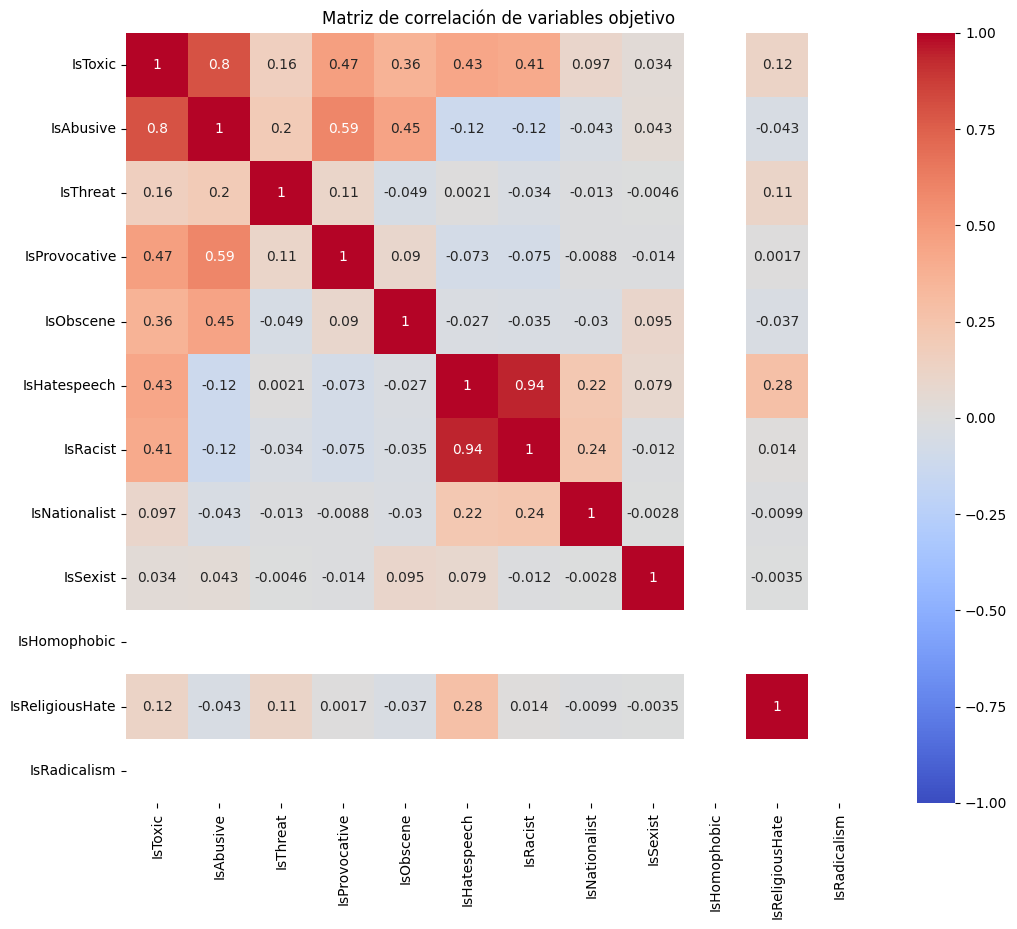

In [5]:
# Calcular y visualizar la matriz de correlación
corr_matrix = df[target_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de correlación de variables objetivo')
plt.show()


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenizar
    tokens = word_tokenize(text)
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['Text'].apply(clean_text)


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['clean_text'])

# Convertir a DataFrame para mejor visualización
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())


   able  absolutely  abuse  accountable  accounts  act    action  actions  \
0   0.0    0.000000    0.0     0.112887       0.0  0.0  0.103202  0.10587   
1   0.0    0.000000    0.0     0.000000       0.0  0.0  0.000000  0.00000   
2   0.0    0.000000    0.0     0.000000       0.0  0.0  0.000000  0.00000   
3   0.0    0.000000    0.0     0.000000       0.0  0.0  0.000000  0.00000   
4   0.0    0.210487    0.0     0.000000       0.0  0.0  0.000000  0.00000   

   actual  actually  ...  yall  yeah  year  years  yes  yet  young     youre  \
0     0.0  0.088894  ...   0.0   0.0   0.0    0.0  0.0  0.0    0.0  0.085032   
1     0.0  0.000000  ...   0.0   0.0   0.0    0.0  0.0  0.0    0.0  0.000000   
2     0.0  0.193520  ...   0.0   0.0   0.0    0.0  0.0  0.0    0.0  0.000000   
3     0.0  0.000000  ...   0.0   0.0   0.0    0.0  0.0  0.0    0.0  0.000000   
4     0.0  0.000000  ...   0.0   0.0   0.0    0.0  0.0  0.0    0.0  0.000000   

   youtube  zimmerman  
0      0.0        0.0  
1      0

In [8]:
# Número de palabras
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

# Número de caracteres únicos
df['unique_char_count'] = df['clean_text'].apply(lambda x: len(set(x)))

# Proporción de mayúsculas
df['uppercase_ratio'] = df['Text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x))

print(df[['word_count', 'unique_char_count', 'uppercase_ratio']].describe())


        word_count  unique_char_count  uppercase_ratio
count  1000.000000        1000.000000      1000.000000
mean     17.341000          18.260000         0.052836
std      24.054216           5.192433         0.108263
min       1.000000           2.000000         0.000000
25%       5.000000          15.000000         0.013699
50%      10.000000          19.000000         0.025263
75%      20.000000          22.000000         0.050000
max     381.000000          27.000000         0.875000


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['text_length', 'word_count', 'unique_char_count', 'uppercase_ratio']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df[numeric_features].describe())


        text_length    word_count  unique_char_count  uppercase_ratio
count  1.000000e+03  1.000000e+03       1.000000e+03     1.000000e+03
mean   1.421085e-17 -4.263256e-17      -2.984279e-16    -1.421085e-17
std    1.000500e+00  1.000500e+00       1.000500e+00     1.000500e+00
min   -6.745137e-01 -6.796803e-01      -3.133047e+00    -4.882785e-01
25%   -5.119393e-01 -5.133061e-01      -6.281508e-01    -3.616836e-01
50%   -3.124162e-01 -3.053383e-01       1.425864e-01    -2.548098e-01
75%    1.161890e-01  1.105973e-01       7.206393e-01    -2.620701e-02
max    1.564943e+01  1.512587e+01       1.684061e+00     7.597973e+00


In [10]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las 10 mejores características para cada variable objetivo
for target in target_columns:
    selector = SelectKBest(f_classif, k=10)
    X_selected = selector.fit_transform(tfidf_df, df[target])
    selected_features = tfidf_df.columns[selector.get_support()].tolist()
    print(f"Top 10 características para {target}:")
    print(selected_features)
    print("\n")


Top 10 características para IsToxic:
['ass', 'fuck', 'fucking', 'idiot', 'peggy', 'run', 'shit', 'stupid', 'thug', 'video']


Top 10 características para IsAbusive:
['ass', 'bullshit', 'dumb', 'fuck', 'fucking', 'fucks', 'idiot', 'run', 'shit', 'shoot']


Top 10 características para IsThreat:
['able', 'door', 'driver', 'eye', 'fast', 'kept', 'kill', 'past', 'ran', 'together']


Top 10 características para IsProvocative:
['claim', 'drive', 'id', 'poverty', 'ran', 'rounds', 'run', 'shoot', 'suicide', 'wouldve']


Top 10 características para IsObscene:
['ass', 'big', 'cunts', 'fuck', 'fucker', 'fucking', 'justify', 'kid', 'mouth', 'shit']


Top 10 características para IsHatespeech:
['black', 'blacks', 'isis', 'looking', 'muslim', 'running', 'terrorist', 'thug', 'white', 'whites']


Top 10 características para IsRacist:
['animals', 'black', 'blacks', 'looking', 'parents', 'running', 'see', 'thug', 'white', 'whites']


Top 10 características para IsNationalist:
['americans', 'backup', 'cons

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
